In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets
!pip install -q tensorflow-ranking

import tensorflow_datasets as tfds
import tensorflow_ranking as tfr
import tensorflow_recommenders as tfrs

     |████████████████████████████████| 85 kB 2.3 MB/s 
     |████████████████████████████████| 462 kB 12.8 MB/s 
     |████████████████████████████████| 4.2 MB 4.9 MB/s 
     |████████████████████████████████| 141 kB 5.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import math
import random
from random import seed
from random import randrange
from csv import reader
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
SGD = tf.keras.optimizers.SGD()
from tensorflow.keras.optimizers import Adam,Nadam, SGD
from tensorflow.keras.utils import to_categorical
import sklearn.metrics
from sklearn.metrics import classification_report
#import tensorflow_recommenders as tfrs


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Load the dataset
df = pd.read_csv('gdrive/MyDrive/SE_Project_NNLRank/Copy of Successful_Failed_Onboarding_v3.csv')
#df = pd.read_csv('gdrive/MyDrive/SE Project Dataset/Successful_Failed_Onboarding.csv')
'''for i in df.columns[df.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    df[i].fillna(df[i].mean(),inplace=True)'''
#df.replace(0,np.nan, inplace = True)
df = df.fillna(df.mean())
df.head()
#print(df)

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


,project_id,owner_id,user_id,Time_Create,Time_Meb0,Time_Meb1,Time_Cmt0,Time_Cmt1,project_language,Tech_lang,Project_Member,Project_Commit_Count,Project_Size,Open_Issues_Count,Forks,Watchers,Network_Count,Stargazers_Count,has_star_developer,Successful_Onboarding
0,202,1653,1662,119,0,649796,20239,2896337,JavaScript,4,195,52227,999796.0,683.0,683.0,2331.0,2092.0,226.0,1,1
1,392,2997,138128,60,0,3316225,65,2097657,JavaScript,2,122,17900,92974.0,2791.0,2791.0,8180.0,33671.0,1602.0,1,0
2,392,2997,2028259,60,0,3316225,65,2097657,JavaScript,2,122,17900,92974.0,2791.0,2791.0,8180.0,33671.0,1602.0,1,1
3,540,3797,36361,120,0,2355387,6140,2095492,JavaScript,3,10,15531,74341.0,429.0,429.0,4272.0,22163.0,903.0,1,1
4,544,4233,4334,119,0,369290,1244705,2106930,JavaScript,7,16,6625,41122.0,111.0,111.0,308.0,2152.0,63.0,1,1


In [4]:
# Dataset preprocessing

column_name=list(df.iloc[:,np.r_[0,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19]])

print("Features and Targets:",column_name)

pro_data=df[column_name].to_numpy()

X=pro_data[:,:16]
y=pro_data[:,-1]

'''X[X == 0] = 'nan'

col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])'''

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)



Features and Targets: ['project_id', 'user_id', 'Time_Create', 'Time_Meb0', 'Time_Meb1', 'Time_Cmt0', 'Time_Cmt1', 'Tech_lang', 'Project_Member', 'Project_Commit_Count', 'Project_Size', 'Open_Issues_Count', 'Forks', 'Watchers', 'Network_Count', 'Stargazers_Count', 'has_star_developer', 'Successful_Onboarding']


In [5]:
#scaler = preprocessing.StandardScaler()
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
x_train[0]

array([1.23037466e-01, 1.22456965e-03, 1.14186622e-05, 0.00000000e+00,
       0.00000000e+00, 1.49105986e-03, 2.13310952e-01, 1.53846154e-01,
       2.54110613e-02, 6.10076096e-04, 3.94759854e-05, 7.60745531e-04,
       7.60745531e-04, 1.73334748e-03, 4.98866610e-04, 3.30695642e-03])

In [7]:
def arctan(self, x, derivative=False):
        if (derivative == True):
            return (tf.math.cos(x) ** 2)
        return tf.math.atan(x)

from keras import backend as K


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mAP(y_true,y_pred):
	num_classes = y_true.shape[1]
	average_precisions = []
	relevant = K.sum(K.round(K.clip(y_true, 0, 1)))
	tp_whole = K.round(K.clip(y_true * y_pred, 0, 1))
	for index in range(num_classes):
		temp = K.sum(tp_whole[:,:index+1],axis=1)
		average_precisions.append(temp * (1/(index + 1)))
	AP = K.sum(average_precisions) / relevant
	mAP = K.mean(AP,axis=0)
	return mAP

def weighted_binary_crossentropy(self, y_true, y_pred):
    logloss = -(y_true * K.log(y_pred) * self.weights[0] + \
               (1 - y_true) * K.log(1 - y_pred) * self.weights[1])

    return K.mean(logloss, axis=-1)


In [8]:
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
  model = Sequential()
  model.add(Dense(5, activation='relu', kernel_initializer='random_normal',bias_initializer='zeros'))
  model.add(Dense(5, activation='relu'))
  #model.add(Dense(5,input_dim=5, activation='sigmoid')
  model.add(Dense(1, activation='sigmoid'))
 

  

	# compile model
  
  opt = SGD(learning_rate=0.01)
  #model.compile(loss=tfr.keras.losses.ListMLELoss(lambda_weight=1.0), optimizer=opt, metrics=['accuracy',precision_m,recall_m,f1_m])
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics=['accuracy',precision_m,recall_m,f1_m, tfr.keras.metrics.MeanAveragePrecisionMetric(name=None, topn=None, dtype=None, ragged=False)])
  #model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt, metrics=['accuracy',precision_m,recall_m,f1_m])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0, batch_size=n_batch)
  #history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=0)

  
  loss, accuracy, precision, recall,f1_score,map = model.evaluate(testX, testy, verbose=0)
  
  print('\n')
  print('prediction score for NNLRank at: ',n_batch)
  print('accuracy:',accuracy *100, 'f1_score:',f1_score *100)
  print('precision:',precision *100, 'recall:',recall *100)
  print('Loss:',loss,'MAP:',map *100)
  #print('report:',report)
  print('\n')

	# plot learning curves
  # plot loss history
  
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('batch='+str(n_batch), pad=-40)
  
  # show learning curves
  plt.show()




prediction score for NNLRank at:  4
accuracy: 64.8128867149353 f1_score: 66.77170395851135
precision: 69.34784054756165 recall: 65.76482057571411
Loss: 0.6396276354789734 MAP: 55.660825967788696




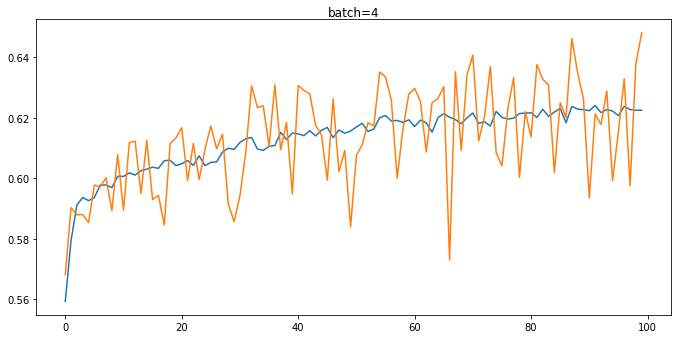



prediction score for NNLRank at:  8
accuracy: 61.30743622779846 f1_score: 69.96794939041138
precision: 61.17950081825256 recall: 83.30809473991394
Loss: 0.6449815630912781 MAP: 55.660825967788696




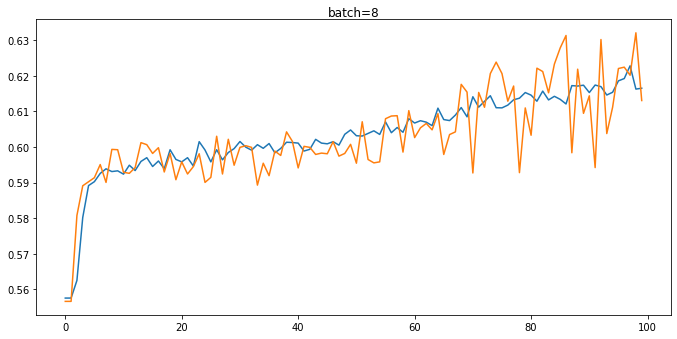



prediction score for NNLRank at:  16
accuracy: 62.04642057418823 f1_score: 67.83711910247803
precision: 63.775068521499634 recall: 74.00400638580322
Loss: 0.6513301730155945 MAP: 55.660825967788696




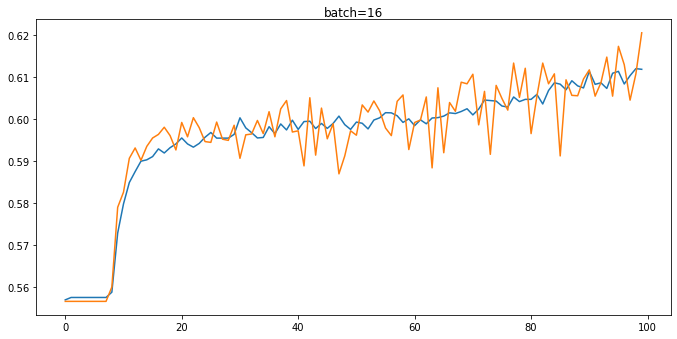



prediction score for NNLRank at:  32
accuracy: 61.77167296409607 f1_score: 68.79494190216064
precision: 62.61281371116638 recall: 77.87059545516968
Loss: 0.652859628200531 MAP: 55.660825967788696




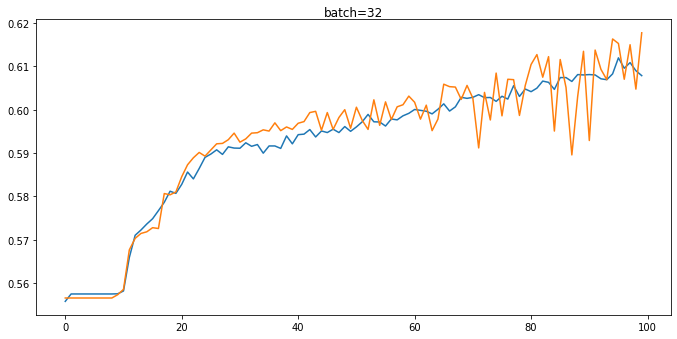

In [9]:
# create learning curves for different batch sizes

batch_sizes = [4,8,16,32]
for i in range(len(batch_sizes)):
	# determine the plot number
	plt.figure(figsize=(25, 25))
	plot_no = 420 + (i+1)
	plt.subplot(plot_no)
 
	# fit model and plot learning curves for a batch size
	fit_model(x_train,y_train,x_test,y_test, batch_sizes[i])
  
# show learning curves
#plt.show()